# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

### Reminder of Folders' Path

In [5]:
import os
# Home_dir = '/home/carnd/traffic-signs'
Home_dir = os.path.abspath(os.getcwd())
Test_image_dir = os.path.join(Home_dir, os.path.abspath('GTSRB/Final_Test/Images'))
GTSRB_dir = os.path.join(Home_dir, os.path.abspath('GTSRB'))

print(Home_dir)
print(Test_image_dir)
print(GTSRB_dir)

/home/carnd/traffic-signs
/home/carnd/traffic-signs/GTSRB/Final_Test/Images
/home/carnd/traffic-signs/GTSRB


### Download the dataset if it hasn't been downloaded.

In [6]:
import urllib.request as ulr
import zipfile, glob, os
os.chdir(Home_dir)
print('Changing to Home_dir.')
if not (glob.glob('traffic-signs-data.zip') or glob.glob('test.p')):
    filez, headers = ulr.urlretrieve('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip','traffic-signs-data.zip')
else:
    print('traffic-signs-data.zip already downloaded.')

Changing to Home_dir.
traffic-signs-data.zip already downloaded.


### Extract the zip file if it hasn't been unzipped.

In [7]:
os.chdir(Home_dir)
print('Changing to Home_dir.')
if not (glob.glob('train.p')):
    data = zipfile.ZipFile(filez,'r')
    data.extractall()
    data.close()
else:
    print('traffic-signs-data.zip already unzipped.')

Changing to Home_dir.
traffic-signs-data.zip already unzipped.


### Load the Data.

In [8]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data
os.chdir(Home_dir)
print('Changing to Home_dir.')
cwd = os.getcwd()
training_file =  os.path.join(cwd, os.path.abspath('train.p'))
validation_file = os.path.join(cwd,  os.path.abspath('valid.p'))
testing_file = os.path.join(cwd , os.path.abspath('test.p'))

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('Data loaded.')

Changing to Home_dir.
Data loaded.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [9]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd
# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
os.chdir(Home_dir)
print('Changing to Home_dir.')
cwd = os.getcwd()
signnames = []
with open(os.path.join(cwd, 'signnames.csv'),'rb') as signnamescsv:
    for row in signnamescsv:
        signnames.append(row.decode('utf-8').rstrip().split(',')[1])
signnames = pd.Series(signnames[1:])
n_classes = signnames.shape[0]

print("Number of training examples =", n_train)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("columns of the pickled data: ", train.keys())
print('The shape of the pictures is {}'.format(repr(X_train[0,0:32,0:32,0].shape)))

Changing to Home_dir.
Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
columns of the pickled data:  dict_keys(['coords', 'features', 'labels', 'sizes'])
The shape of the pictures is (32, 32)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

        Amount of Signs                                      Name of Signs
labels                                                                    
0                   180                               Speed limit (20km/h)
1                  1980                               Speed limit (30km/h)
2                  2010                               Speed limit (50km/h)
3                  1260                               Speed limit (60km/h)
4                  1770                               Speed limit (70km/h)
5                  1650                               Speed limit (80km/h)
6                   360                        End of speed limit (80km/h)
7                  1290                              Speed limit (100km/h)
8                  1260                              Speed limit (120km/h)
9                  1320                                         No passing
10                 1800       No passing for vehicles over 3.5 metric tons
11                 1170  

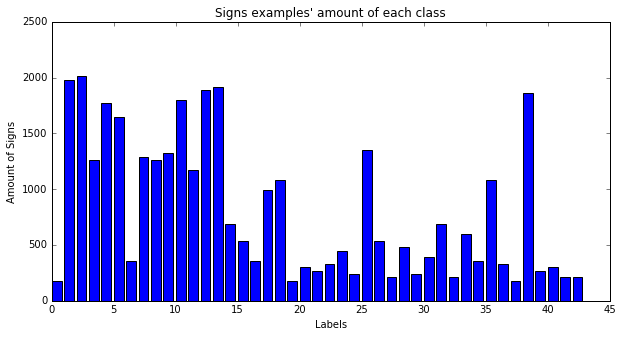

In [10]:
# Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline
labelsgroup = pd.DataFrame({'labels':train['labels']})
summary = pd.DataFrame(labelsgroup.groupby('labels').size())
summary.insert(1,'Signs',signnames)
summary.columns = ['Amount of Signs','Name of Signs']
plt.figure(figsize=(10,5))
plt.title('Signs examples\' amount of each class')
plt.xlabel('Labels')
plt.ylabel('Amount of Signs')
plt.bar(summary.index,summary['Amount of Signs'])
print(summary)

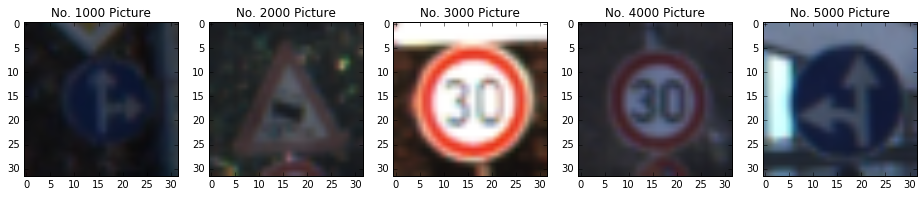

In [11]:
n = 1000
fig, ax = plt.subplots(1,5,figsize = (16,16))
for ind in range(5):
    img = X_train[n * (ind + 1)].squeeze()
    ax[ind].set_title('No. {} Picture'.format(n + 1000 * ind))
    ax[ind].imshow(img)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 2.1 Generate fake pictures

#### Remain the ratio unchanged or not

I read some articles building effective model on GTSRB classification. One of them says he will not change the relative number of the signs.

[(98.8% solution) German sign classification using deep learning neural networks](https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad)

> In this data set the most common sign was the 20 kmph sign. We will not change the relative number of these signs because the incidence rates in the data reflects prior probability of observing a new sign. Leaving relative ratio of images unchanged biases the model towards predicting more frequent sign when the model is unsure between two signs.

[Dealing with unbalanced data: Generating additional data by jittering the original image](https://medium.com/@vivek.yadav/dealing-with-unbalanced-data-generating-additional-data-by-jittering-the-original-image-7497fe2119c3)

Before I trained a model good enough on the test set, I will try generate fake examples to make each sign class have similar amount of images. 

In [12]:
import cv2
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
        img = augment_brightness_camera_images(img)

    return img

In [13]:
train_valid_labels = pd.DataFrame({'labels':np.concatenate((train['labels'],valid['labels']), axis = 0)})
train_valid_summary = pd.DataFrame(train_valid_labels.groupby('labels').size())
train_valid_summary.columns = ['Amount of Signs']
max_class_pic = int(max(train_valid_summary['Amount of Signs'])) # each class will have this amount of images

#### Fake examples introduction

Image data shape = (32, 32, 3)


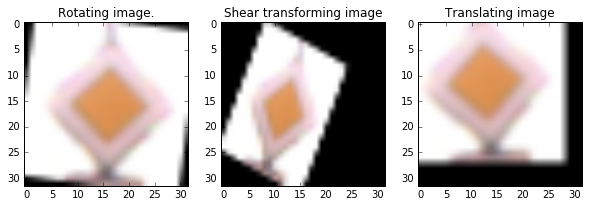

In [14]:
image_check = int(np.random.uniform(30000))
image = X_train[image_check,:,:,:]
fig,ax = plt.subplots(1,3, figsize = (10,5))

image1 = transform_image(image,80,0,0)
image2 = transform_image(image,0,10,0)
image3 = transform_image(image,0,0,10)

ax[0].set_title('Rotating image.')
ax[0].imshow(image1)
ax[1].set_title('Shear transforming image')
ax[1].imshow(image2)
ax[2].set_title('Translating image')
ax[2].imshow(image3)

print("Image data shape =", image_shape)

#### Combine train and valid set. make all the data useful.

In [15]:
X_train_valid = np.concatenate((X_train, X_valid), axis = 0)
y_train_valid = np.concatenate((y_train, y_valid), axis = 0)

In [16]:
print(X_train_valid.shape)
print(y_train_valid.shape)
examples_before_fake_generation = X_train_valid.shape[0]

(39209, 32, 32, 3)
(39209,)


#### Generate examples (time consuming: whole generation consumes about 1.5 hour on AWS g2.2xlarge)

In [17]:
each_class_need = 0
# generated_examples = np.array([])
# y_generated_examples = np.array([])
os.chdir(Home_dir)
print('Changing to Home_dir.')
if not glob.glob('generate_fake_examples.p'):
    for sign_class in range(n_classes):
        '''don't generate too many pics: time consuming'''
        each_class_need = max_class_pic - sum(y_train_valid == sign_class)
        if each_class_need > 1000:
            each_class_need -= 1000
        
        if sign_class % 5 == 0:
            print('Generating #{} class\'s fake examples...'.format(sign_class))
         
        ind = np.array(np.where(y_train_valid == sign_class))# find indices where y_label = sign_class 
        for n_img in range(each_class_need):
            rand_ind = np.int(np.random.uniform(ind.shape[1]))
            img = X_train_valid[rand_ind]
            label = y_train_valid[rand_ind]
            new_img = transform_image(img,5,5,5).reshape((1,32,32,3))

            X_train_valid = np.concatenate((X_train_valid, new_img), axis = 0)
            y_train_valid = np.concatenate((y_train_valid, np.array([label])))

    with open('generate_fake_examples.p', 'wb') as pf:
        pickle.dump(
            {
                'X_train_valid': X_train_valid,
                'y_train_valid': y_train_valid,
            }, pf, pickle.HIGHEST_PROTOCOL)
    print('Done.')
else:
    print('Fake examples already generated.')

Changing to Home_dir.
Fake examples already generated.


#### Import generated data

In [18]:
# Reload the data
pickle_file = 'generate_fake_examples.p'
with open(pickle_file, 'rb') as f:
    pickle_data = pickle.load(f)
    X_train_new = pickle_data['X_train_valid']
    y_train_new = pickle_data['y_train_valid']

print('Data loaded.')
print('train set\'s shape is :', X_train_new.shape)

Data loaded.
train set's shape is : (65617, 32, 32, 3)


In [19]:
print('Examples\' amount after generating fake images:', X_train_new.shape[0])
print('Fake examples generated:', X_train_new.shape[0] - examples_before_fake_generation)

Examples' amount after generating fake images: 65617
Fake examples generated: 26408


index of check_image: 41531
class of check_image: 36 Go straight or right


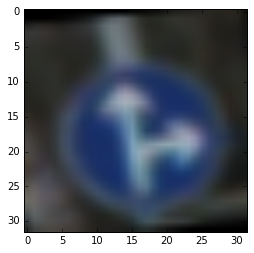

In [20]:
img_to_check = np.int(np.random.uniform(40000,50000))
print('index of check_image:', img_to_check)
plt.imshow(X_train_new[img_to_check])
print('class of check_image:', y_train_new[img_to_check], summary.loc[y_train_new[img_to_check],'Name of Signs'])

#### Training data splitting for validation dataset (85%:15%)

In [21]:
from sklearn.utils import shuffle
X_train_new, y_train_new = shuffle(X_train_new, y_train_new)

from sklearn.model_selection import train_test_split
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(X_train_new, y_train_new, test_size=0.15, random_state=0)

print('Splitting done.')
print('Train set\'s shape is:', X_train_new.shape)
print('Validationg set\'s shape is:', X_valid_new.shape)

Splitting done.
Train set's shape is: (55774, 32, 32, 3)
Validationg set's shape is: (9843, 32, 32, 3)


### 2.2 Preprocessing Images

#### Grayscale the Data Set

In [22]:
def grayimg(x):
    return np.dot(x,np.array([0.299,0.587,0.114]))

In [23]:
X_train_gray = grayimg(X_train_new)
# y_train_new
X_valid_gray = grayimg(X_valid_new)
# y_valid_new
X_test_gray = grayimg(X_test)
# y_test

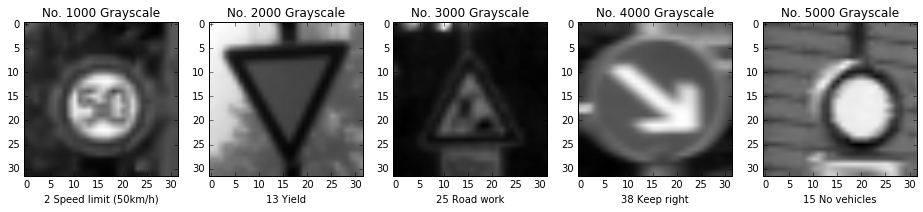

In [24]:
n = 1000
fig, ax = plt.subplots(1,5,figsize = (16,16))
for ind in range(5):
    img = X_train_gray[n * (ind + 1)].squeeze()
    sign_class = summary.loc[y_train_new[n * (ind + 1)],'Name of Signs']
    label =  str(y_train_new[n * (ind + 1)]) + ' ' + sign_class
    ax[ind].set_title('No. {} Grayscale'.format(n + 1000 * ind))
    ax[ind].set_xlabel(label)
    ax[ind].imshow(img, cmap = 'gray')

#### Normalize the Data Set

In [25]:
# normalize the pictures
def normal_pics(array):
    # return np.divide((array-np.mean(array, axis = 1)[:,None,:]), np.std(array, axis = 1)[:,None,:])
    return (array - array.mean()) / array.std()

In [26]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# X_train_gray = (X_train_gray - 128) / 128
# X_valid_gray = (X_valid_gray - 128) / 128
# X_test_gray = (X_test_gray - 128) / 128
# X_train = (X_train - 128) / 128
# X_valid = (X_train - 128) / 128
# X_test = (X_test - 128) / 128

X_train_gray = normal_pics(X_train_gray)
X_valid_gray = normal_pics(X_valid_gray)
X_test_gray = normal_pics(X_test_gray)

### 2.3 Model Architecture

In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf
channels = 1 # grayscale or not
p_keep_1= 1
p_keep = 1

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name = 'myconv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name = 'myconv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1, name = 'myconv1')
 
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID',name = 'myconv1_pool')
    # dropout
    conv1 = tf.nn.dropout(conv1, p_keep_1)
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name = 'myconv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name = 'myconv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2, name = 'myconv2')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name = 'myconv2_pool')
    # dropout
    conv2 = tf.nn.dropout(conv2, p_keep)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name = 'myfc1_W')
    fc1_b = tf.Variable(tf.zeros(120), name = 'myfc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # dropout
    fc1    = tf.nn.dropout(fc1, p_keep)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1, name = 'myfc1')
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name = 'myfc2_W')
    fc2_b  = tf.Variable(tf.zeros(84), name = 'myfc2_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    # dropout
    fc2    = tf.nn.dropout(fc2, p_keep)
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2, name = 'myfc2')
    
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma), name = 'myfc3_W')
    fc3_b  = tf.Variable(tf.zeros(43), name = 'myfc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
print('Done.')

Done.


### 2.4 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [28]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, channels), name = 'x')
y = tf.placeholder(tf.int32, (None), name = 'y')
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
EPOCHS = 50
BATCH_SIZE = 128

In [29]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [30]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print('Done.')

Done.


#### Adjust dimensions.

In [31]:
if X_train_gray.ndim == 3:
    X_train_gray = X_train_gray[...,None]
if X_valid_gray.ndim == 3:
    X_valid_gray = X_valid_gray[...,None]
if X_test_gray.ndim == 3:
    X_test_gray = X_test_gray[...,None]

# if channels == 1:
#    X_train = X_train_gray
#    X_valid = X_valid_gray
#    X_test = X_test_gray 

In [32]:
print('shape of pictures after grayscaling is {}'.format(X_train_gray[0].shape))

shape of pictures after grayscaling is (32, 32, 1)


#### Backup the model

In [33]:
os.chdir(Home_dir)
print('Changing to Home_dir.')

lenetfiles = glob.glob('lenet.*')

backup_model = False
if not backup_model:
    #for file in lenetfiles:
    #    os.rename(file, 'backup-'+file)
    for file in lenetfiles:
        os.remove(file)
        print('{} deleted'.format(file))
    if not lenetfiles:
        print('No model.')

Changing to Home_dir.
lenet.index deleted
lenet.data-00000-of-00001 deleted
lenet.meta deleted


#### Train the model if there isn't a trained model.

In [34]:
from sklearn.utils import shuffle
os.chdir(Home_dir)
print('Changing to Home_dir.')
print(Home_dir)

if not glob.glob('lenet.*'):
    print('No model. Begin training.')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_gray)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train_gray, y_train_new = shuffle(X_train_gray, y_train_new)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_gray[offset:end], y_train_new[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_valid_gray, y_valid_new)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, os.path.abspath('lenet'))
        print("Model saved")
else:
    print('Model exists.')

Changing to Home_dir.
/home/carnd/traffic-signs
No model. Begin training.
Training...

EPOCH 1 ...
Validation Accuracy = 0.889

EPOCH 2 ...
Validation Accuracy = 0.931

EPOCH 3 ...
Validation Accuracy = 0.953

EPOCH 4 ...
Validation Accuracy = 0.964

EPOCH 5 ...
Validation Accuracy = 0.974

EPOCH 6 ...
Validation Accuracy = 0.974

EPOCH 7 ...
Validation Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.975

EPOCH 9 ...
Validation Accuracy = 0.980

EPOCH 10 ...
Validation Accuracy = 0.983

EPOCH 11 ...
Validation Accuracy = 0.984

EPOCH 12 ...
Validation Accuracy = 0.981

EPOCH 13 ...
Validation Accuracy = 0.985

EPOCH 14 ...
Validation Accuracy = 0.985

EPOCH 15 ...
Validation Accuracy = 0.980

EPOCH 16 ...
Validation Accuracy = 0.985

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.986

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.989

EPOCH 21 ...
Validation Accuracy = 0.984

EPOCH 22 ...
Validation Accuracy = 0.989

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [35]:
# os.chdir('/home/carnd/traffic-signs')
os.chdir(Home_dir)
print('Changing to Home_dir.')

import tensorflow as tf
with tf.Session() as sess:
    # saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess,  os.path.abspath('lenet'))
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Changing to Home_dir.
Test Accuracy = 0.922


### Load and Output the Images

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
os.chdir(Home_dir)
print('Changing to Home_dir.')

if not glob.glob('GTSRB_Images.zip'):
    file, header = ulr.urlretrieve('http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Test_Images.zip','GTSRB_Images.zip')
    print('Downloading test data file...')
    X_zip = zipfile.ZipFile(file, 'r')
    X_zip.extractall()
    X_zip.close()
    print('File unzipped.')
else:
    print('GTSRB_Images.zip exist.')
    
shuffled = False

Changing to Home_dir.
GTSRB_Images.zip exist.


### Change folder to the test pictures' folder. Print names of first 10 pictures.

In [37]:
# '/home/carnd/traffic-signs/GTSRB/Final_Test/Images/'
if os.getcwd() != Test_image_dir:
    os.chdir(Test_image_dir)
    print('Changing to test image dir.')
else:
    print('Current working folder:', Test_image_dir)
print(os.listdir('.')[:10])

if not shuffled:
    imglist = np.array(os.listdir('.')) # store names of all the images in a list
    np.random.shuffle(imglist) # random shuffle the list of names
    shuffled = True
    print('test set shuffled.')
else:
    print('test set already shuffled.')

Changing to test image dir.
['04241.ppm', '11105.ppm', '01024.ppm', '03765.ppm', '11760.ppm', '05918.ppm', '12213.ppm', '00080.ppm', '06801.ppm', '04256.ppm']
test set shuffled.


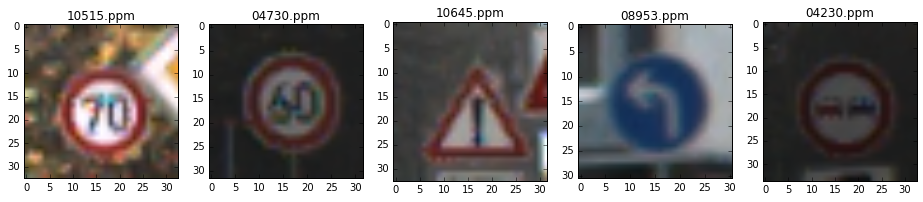

In [38]:
fig, ax = plt.subplots(1,5,figsize=((16,16))) # create 5 subplots for plotting the pics
search = 0
number_of_pics = 0
imlist = [] # list of the 5 pictures for the model to test on.
while number_of_pics < 5:
    img = plt.imread(imglist[search])
    if 30 < img.shape[0] < 35 and 30 < img.shape[1] <35: # choose the pics which have similar shape with (32,32)
        imlist.append(imglist[search])
        ax[number_of_pics].set_title(imglist[search])
        ax[number_of_pics].imshow(img)
        number_of_pics += 1
    search += 1

In [39]:
for ind in range(5):
    print(plt.imread(imlist[ind]).shape) # print the shape of the 5 pics

(33, 33, 3)
(32, 32, 3)
(33, 32, 3)
(31, 31, 3)
(34, 33, 3)


### Convert the 5 pics' shape to (32,32)

In [40]:
def pixel32(fig,imgarray):
    if (fig.shape[0] >= 32 and fig.shape[1] >= 32): # width and height bigger than 32 pixels
        left = max(int(fig.shape[0]/2) - 16,0)
        right = left + 32
        down = max(int(fig.shape[1]/2) - 16,0)
        up = down + 32
        imgarray = np.append(imgarray, (fig[left:right,down:up,:])[None,...], axis = 0)
    elif (fig.shape[0] < 32 and fig.shape[1] >= 32): # width bigger than 32, height less than 32
        fig = np.append(fig, np.zeros((32 - fig.shape[0], fig.shape[1], 3)), axis = 0)
        down = max(int(fig.shape[1]/2) - 16,0)
        up = down + 32
        fig = fig[:,down:up,:]
        imgarray = np.append(imgarray, fig[None,...], axis = 0)
    elif (fig.shape[0] >= 32 and fig.shape[1] < 32): # width bigger than 32, height less than 32
        fig = np.append(fig, np.zeros((fig.shape[0], 32 - fig.shape[1], 3)), axis = 1)
        left = max(int(fig.shape[0]/2) - 16,0)
        right = left + 32
        fig = fig[left:right,...]
        imgarray = np.append(imgarray, fig[None,...], axis = 0)
    else: # width and height are less than 32
        shape0 = fig.shape[0]
        fig = np.append(fig, np.zeros((32 - fig.shape[0], fig.shape[1], 3)), axis = 0)
        fig = np.append(fig, np.zeros((fig.shape[0], 32 - shape0, 3)), axis = 1)
        imgarray = np.append(imgarray, fig[None,...], axis = 0)
    return imgarray

In [41]:
imgarr = np.zeros((1,32,32,3)) # ndarray for 5 pics
for ind in range(5):
    imgarr = pixel32(plt.imread(imlist[ind]),imgarr) # convert the images and add to the ndarray

In [42]:
imgarr_gray = grayimg(imgarr) # grayscale
imgarr_gray = normal_pics(imgarr_gray) # normalization
if imgarr_gray.ndim ==3:
    imgarr_gray = imgarr_gray[...,None] # add a dimension
print('shape of pictures after grayscaling is {}'.format(imgarr_gray[1].shape))

shape of pictures after grayscaling is (32, 32, 1)


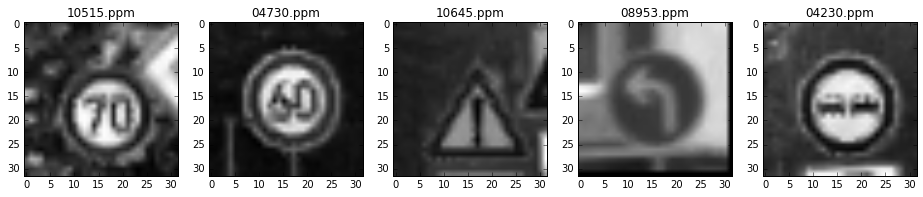

In [43]:
fig, ax = plt.subplots(1,5,figsize=((16,16))) # plot the grayscaled pics
for ind in range(5):
    ax[ind].set_title(imlist[ind])
    ax[ind].imshow(imgarr_gray[ind+1].squeeze(), cmap = 'gray')

### Predict the Sign Type for Each Image

In [44]:
# os.chdir('/home/carnd/traffic-signs')
print(os.getcwd()) # remind to change the folder
os.chdir(Home_dir)
print('Changing to Home_dir.')

y1 = tf.placeholder(tf.int32, (None))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver = tf.train.import_meta_graph(os.path.join(Home_dir, 'lenet.meta'))
    saver.restore(sess, os.path.abspath('lenet')) # restore the model, remind to change the folder
    y1 = sess.run(tf.nn.softmax(logits), feed_dict = {x: imgarr_gray[1:]}) # classify the 5 pics
    # accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})

/home/carnd/traffic-signs/GTSRB/Final_Test/Images
Changing to Home_dir.


In [45]:
imlist_predict_labels = list(np.argmax(y1, axis = 1)) # class of the 5 pics
print('model prediction:', imlist_predict_labels)

model prediction: [4, 3, 27, 34, 9]


### Analyze Performance

In [46]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

os.chdir(GTSRB_dir) # remember to change the folder
print('Changing to GTSRB_dir.')
if not glob.glob('GTSRB_Final_Test_GT.zip'): # download the test images if there aren't
    f, header = ulr.urlretrieve('http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Test_GT.zip', 'GTSRB_Final_Test_GT.zip')
    with zipfile.ZipFile(f,'r') as fcsv: # unzip the zip file
        fcsv.extractall()
    print('Data downloaded and unziped.')
else:
    print('GTSRB_Final_Test_GT.zip exist.')
    
# print(imlist) # names of the 5 pics
all_info = [] # information of the test pics

with open('GT-final_test.csv','rb') as f:
    for row in f:
        all_info.append(row.decode('utf-8'))
    print('All information of test set is imported.')

Changing to GTSRB_dir.
GTSRB_Final_Test_GT.zip exist.
All information of test set is imported.


In [47]:
print('names in all_info:', [a.split(';')[0] for a in all_info[1:6]])

names in all_info: ['00000.ppm', '00001.ppm', '00002.ppm', '00003.ppm', '00004.ppm']


In [48]:
print('names in imglist (shuffled):', imglist[:5])

names in imglist (shuffled): ['09996.ppm' '07562.ppm' '08466.ppm' '07809.ppm' '08900.ppm']


### True labels of these 5 pictures and Model predictions of test pictures

In [49]:
'''
all_info: list # name,...,label
imglist: list # name
 
imlist: list # name 
pic_name: list # name
pic_label: list # name


imlist_predict_labels: list # name, label
imlist_predict_dict: dict # name: label

imlist_true_labels: list # name, label
imlist_true_dict: dict # name: label
'''
print('All variables used.')

All variables used.


In [50]:
def sort_by(x):
    '''sort dict by its value'''
    # dict_a = sorted(x.items(), key=lambda d:d[0])
    dict_a = [(k,x[k]) for k in sorted(x.keys())]
    return dict_a

In [51]:
imlist_true_labels = [] # true labels of pics and their names
imlist_true_dict = {}
pic_name = [] 
pic_label = []
name = []
for imlist_ind in range(5):
    ind = 0
    while len(imlist_true_labels) < 5:
        name = all_info[ind].split(';')[0]
        label = all_info[ind].split(';')[7].rstrip() # strip '\r\n' 
        if name == imlist[len(imlist_true_labels)]: # find the pic
            imlist_true_labels.append(int(label))
            pic_name.append(name)
            pic_label.append(int(label))
            print('Finding {}\'s true label...'.format(imlist_ind))
            break
        ind += 1
imlist_predict_dict = dict(zip(imlist,imlist_predict_labels))
imlist_true_dict = dict(zip(pic_name,pic_label))

print()
print('shuffled name list:\t\t\t', imlist)
print('all info name list in shuffled order:\t', pic_name)
print('\nmodel prediction:\t', imlist_predict_labels)
print('true labels:\t\t', imlist_true_labels)

print('\nmodel prediction dict:\t', imlist_predict_dict)
print('true labels dict:\t', imlist_true_dict)

Finding 0's true label...
Finding 1's true label...
Finding 2's true label...
Finding 3's true label...
Finding 4's true label...

shuffled name list:			 ['10515.ppm', '04730.ppm', '10645.ppm', '08953.ppm', '04230.ppm']
all info name list in shuffled order:	 ['10515.ppm', '04730.ppm', '10645.ppm', '08953.ppm', '04230.ppm']

model prediction:	 [4, 3, 27, 34, 9]
true labels:		 [4, 3, 18, 34, 9]

model prediction dict:	 {'10515.ppm': 4, '04230.ppm': 9, '10645.ppm': 27, '04730.ppm': 3, '08953.ppm': 34}
true labels dict:	 {'10515.ppm': 4, '04230.ppm': 9, '10645.ppm': 18, '04730.ppm': 3, '08953.ppm': 34}


In [52]:
def acc_of(dict1, dict2, list1):
    '''receive two dict and one name list,
    return Logical array
    '''
    acc = []
    for name in list1:
        acc.append(dict1[name] == dict2[name])
    return acc

accuracy_5_pics = acc_of(imlist_true_dict, imlist_predict_dict, imlist) 

# put them into a dataframe 
test_5_pics = pd.DataFrame(data = list(imlist_true_dict.values()), index = imlist_true_dict.keys())
test_5_pics['1'] = list(imlist_predict_dict.values())
test_5_pics['2'] = accuracy_5_pics
test_5_pics.columns = ['True label','Model prediction','Result']
print(test_5_pics,'\n')

accuracy = sum(accuracy_5_pics)
accuracy = accuracy / 5 * 100
print('Model prediction\'s accuracy on 5 new images is {}%'.format(str(accuracy)))

           True label  Model prediction Result
10515.ppm           4                 4   True
04230.ppm           9                 9   True
10645.ppm          18                27  False
04730.ppm           3                 3   True
08953.ppm          34                34   True 

Model prediction's accuracy on 5 new images is 80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [53]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
print(os.getcwd()) # remind to change the folder
os.chdir(Home_dir)
print('Changing to Home_dir.\n')

with tf.Session() as sess:
    saver.restore(sess, os.path.abspath('lenet'))
    top_5 = sess.run(tf.nn.top_k(tf.constant(y1), k = 5))
    
print(top_5)

/home/carnd/traffic-signs/GTSRB
Changing to Home_dir.

TopKV2(values=array([[  1.00000000e+00,   5.31455782e-12,   1.08927739e-29,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.35320573e-12,   1.02474815e-18,
          3.81832943e-23,   1.40899886e-24],
       [  9.93954599e-01,   6.04535220e-03,   5.54284537e-13,
          2.30937553e-14,   2.27228364e-26],
       [  9.99998927e-01,   1.10757037e-06,   1.01757769e-14,
          1.40938024e-15,   1.79414764e-20],
       [  1.00000000e+00,   2.23505871e-12,   7.66827194e-13,
          2.95545618e-14,   1.91108852e-18]], dtype=float32), indices=array([[ 4,  1,  0,  2,  3],
       [ 3,  5,  2, 42, 41],
       [27, 18, 11, 26, 36],
       [34, 38, 36, 35,  3],
       [ 9, 10,  3, 16, 17]], dtype=int32))


In [54]:
top_5_prob = np.divide(top_5.values, np.expand_dims(np.sum(top_5.values, axis = 1),axis=1))
top_5_prob = pd.DataFrame(data = np.append(top_5_prob * 100, top_5.indices.astype(int), axis = 1), index = imlist)
# np.set_printoptions(precision = 2)
col_names = []
print('Certainty of the model\'s predictions:')

with pd.option_context('display.float_format', lambda x: '%.1f%%' % x, 'display.width', 300):
    for ind in range(5):
        col = top_5_prob.pop(ind+5)
        top_5_prob.insert(2*ind ,str(ind), col.astype(int))
        col_names.append('label' + ' ' + str(ind + 1))
        col_names.append('Prob.' + str(ind + 1))
        
    top_5_prob.columns = col_names
    
    for ind in range(5):
        right = list(top_5.indices[:,ind] == imlist_true_labels)
        mark = []
        for a in right:
            if a:
                mark.append(u'\u2714')
            else:
                mark.append(u'\u2718')
        top_5_prob.insert(3 * (ind + 1) - 1,'Result',mark,allow_duplicates=True)

    print(top_5_prob)

Certainty of the model's predictions:
           label 1  Prob.1 Result  label 2  Prob.2 Result  label 3  Prob.3 Result  label 4  Prob.4 Result  label 5  Prob.5 Result
10515.ppm        4  100.0%      ✔        1    0.0%      ✘        0    0.0%      ✘        2    0.0%      ✘        3    0.0%      ✘
04730.ppm        3  100.0%      ✔        5    0.0%      ✘        2    0.0%      ✘       42    0.0%      ✘       41    0.0%      ✘
10645.ppm       27   99.4%      ✘       18    0.6%      ✔       11    0.0%      ✘       26    0.0%      ✘       36    0.0%      ✘
08953.ppm       34  100.0%      ✔       38    0.0%      ✘       36    0.0%      ✘       35    0.0%      ✘        3    0.0%      ✘
04230.ppm        9  100.0%      ✔       10    0.0%      ✘        3    0.0%      ✘       16    0.0%      ✘       17    0.0%      ✘


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="http://or0cssy3i.bkt.clouddn.com/1499948029_a.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [55]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

/home/carnd/traffic-signs
Changing to Home_dir.
This is default graph.


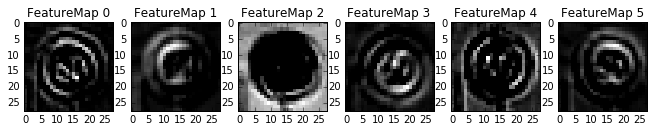

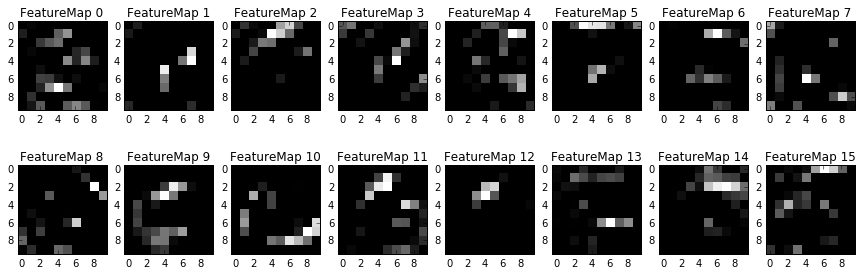

In [56]:
print(os.getcwd()) # remind to change the folder
os.chdir(Home_dir)
print('Changing to Home_dir.')

from tensorflow.contrib import graph_editor as ge
with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(os.path.abspath('lenet.meta'))
    saver.restore(sess, os.path.abspath('lenet'))
    print('This is default graph.') if (sess.graph == tf.get_default_graph()) else print('not default graph')
    graph = tf.get_default_graph()
    
    '''
    #tensors tensors = tf.global_variables()
    tensors = ge.get_tensors(graph)  
    tensor_names = [a.name for a in tensors]
    # myconv = [a for a in tensor_names if 'myconv' in a ]
    # print(myconv)
    
    # operations 
    operations = graph.get_operations()
    operations_names = [a.name for a in operations]
    # print(operations_names[:5])
    '''
    
    my_act1 = graph.get_tensor_by_name('myconv1:0')
    my_act2 = graph.get_tensor_by_name('myconv2:0')
    # print(type(layer))
    outputFeatureMap(np.expand_dims(imgarr_gray[2],0), my_act1,activation_min=-1, activation_max=-1 ,plt_num=1)
    outputFeatureMap(np.expand_dims(imgarr_gray[2],0), my_act2,activation_min=-1, activation_max=-1 ,plt_num=2)